# **PHYS 481 - Computational Physics II**

## **Assignment #6 - Random Walks**

### **NAME:** Scott Salmon

### **UCID:** 30093320

### **FILE:** a6_scottsalmon

### **DATES:** 2024/11/07 - 2024/11/08

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1:
A grain of pollen suspended in a liquid undergoes Brownian motion. In each time interval $dt$, assume it has an equal probability of moving a distance ℓ to the left or ℓ to the right (an admittedly simplistic model). Model this as a random walk and simulate an ensemble of several thousand trials. 

Plot a histogram of the normalized displacement 𝑥/ℓ after 100 $dt$, 500 $dt$, 1000 $dt$ and 10000 $dt$. Include the analytic probability on the graph using the Central Limit Theorem.

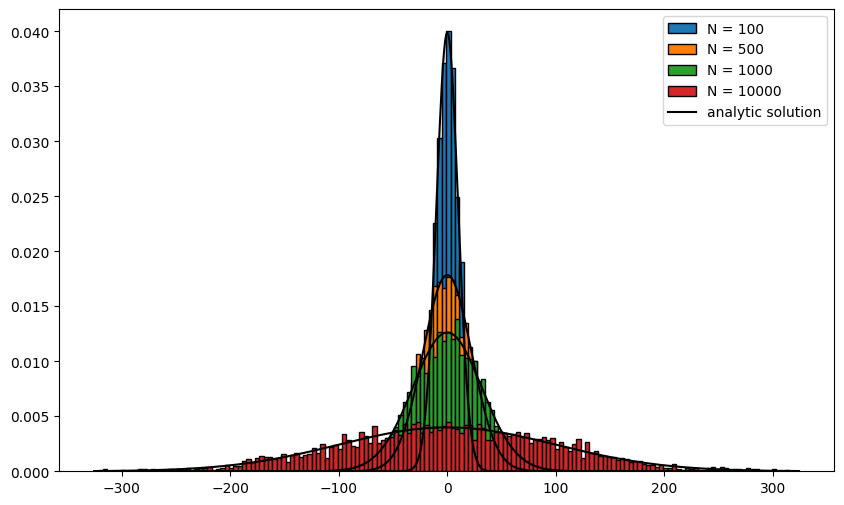

In [7]:
def walking(walkers, steps, L, q):
    
    '''This function is depicts a random walk over a 1D lattice with a variable amount of "walkers" that all walk
    the same amount of steps. L describes how much each step is worth, in this question L=1. q is the probability that
    the step will be a +L or not.
    '''
    
    #this initializes our position list
    position_list = np.array([])
    
    #loop for every walker
    for i in range(walkers):

        #loop for every step
        position = 0
        for j in range(steps):

            #creates a random probability between [0,1).
            rand = np.random.rand()
            prob = q - rand

            #if rand > q, then prob will be negative and step will be a -L. if rand < q, then prob will be positive and step will be +L.
            if prob > 0:
                position += L
            else:
                position -= L
        position_list = np.append(position_list, position)
    
    return position_list

def CLT(x, sigma, mu):
    
    '''This function depicts the central limit theorem to find the analytic solution to this distribution.
    inputs are an array of x values, the variance in the x values, and the mean of the x values.'''
    
    y = 1/ (sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))
    return y

#setting the amount of walkers, step size, and probability
walkers = 2500
L = 1
q = 0.50

#loops for 4 variations of step count
plt.figure(figsize=(10,6))
for i in [100, 500, 1000, 10000]:
    
    x = walking(walkers, i, L, q)
    plt.hist(x, bins=np.arange(-325,325, 4), density=True, edgecolor='black', label='N = '+str(i))
    
    #this makes the analytical solution using the formulas for mu and sigma we got in class
    x = np.arange(-325,325,1)
    sigma = np.sqrt(4*i*L**2*q*(1-q))
    mu = i*L*(2*q-1)
    y = CLT(x, sigma, mu)
    
    #only prints the analytic solution label on last loop
    label = "analytic solution" if i == 10000 else None
    plt.plot(x, y, color='black', label=label)
    plt.legend()
plt.show()

### Question 2:

Repeat question 1 but assume the probability of moving to the right in time interval d𝑡 is 60% (instead of 50% as in question 1). 

Plot a histogram of the normalized displacement after 100 $d𝑡$, 500 $d𝑡$, 900 $d𝑡$ and 1300 $d𝑡$. Include the analytic probability on the graph using the Central Limit Theorem.

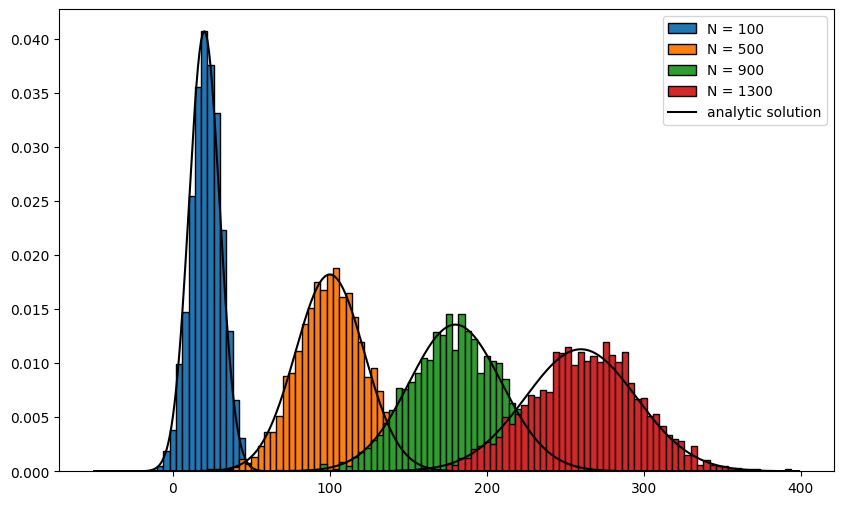

In [8]:
#setting the probability to 60% instead of 50%
q = 0.60

#loops for 4 variations of step count
plt.figure(figsize=(10,6))
for i in [100, 500, 900, 1300]:
    
    x = walking(walkers, i, L, q)
    plt.hist(x, bins=np.arange(-50,400, 4), density=True, edgecolor='black', label='N = '+str(i))

    #this makes the analytical solution using the formulas for mu and sigma we got in class
    x = np.arange(-50, 400, 1)
    sigma = np.sqrt(4*i*L**2*q*(1-q))
    mu = i*L*(2*q-1)
    y = CLT(x, sigma, mu)
    
    #only prints the analytic solution label on last loop
    label = "analytic solution" if i == 1300 else None
    plt.plot(x, y, color='black', label=label)
    plt.legend()
plt.show()

### Question 3:

A more realistic approximation for Brownian motion is that in each time interval d𝑡, the pollen moves a distance 𝑑 that obeys a Gaussian distribution. 

Assuming the Gaussian distribution for the step length has 𝜇 = 0.2ℓ and 𝜎 = ℓ, plot a histogram of the normalized displacement after 100 $d𝑡$, 500 $d𝑡$, 900 $d𝑡$ and 1300 $d𝑡$, including the analytic probability.

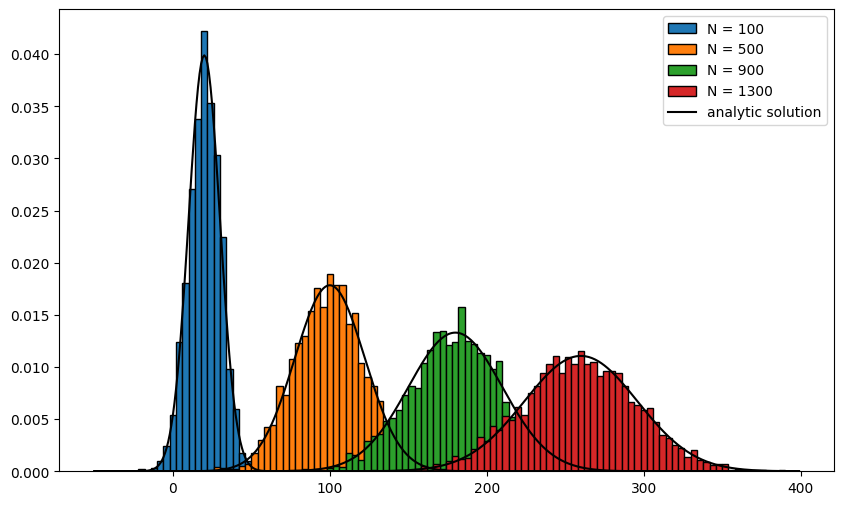

In [ ]:
def realistic_walking(walkers, steps, sigma, mu):
    
    '''Instead of relying on a probability like we did for q1 and q2, we use a given sigma and mu step count value. so all we need
    to do is the the np.random distribution model with the sigma and mu factors added in.'''

    position = np.zeros(walkers)

    #iterates with the given step length
    for i in range(steps):
        step = np.random.normal(size=walkers)*sigma + mu
        position += step
    
    return position

#setting the step size and the amount of walkers
walkers = 2500
sigma_step = 1.0
mu_step = 0.2

#loops for 4 variations of step count
plt.figure(figsize=(10,6))
for i in [100, 500, 900, 1300]:

    x = realistic_walking(walkers, i, sigma_step, mu_step)
    plt.hist(x, bins=np.arange(-50,400, 4), density=True, edgecolor='black', label='N = '+str(i))

    #this makes the analytical solution, and creates the total sigma and mu values depending on the quantity of steps
    x = np.arange(-50, 400, 1)
    sigma = np.sqrt(i) * sigma_step
    mu = i * mu_step
    y = CLT(x, sigma, mu)
    
    #only prints the analytic solution label on last loop
    label = "analytic solution" if i == 1300 else None
    plt.plot(x, y, color='black', label=label)
    plt.legend()
plt.show()

### Question 4:

Let’s say the step distance 𝑑 is instead chosen from the intentionally arbitrary function:

$$ \frac{𝑑}{ℓ} = (2u-1)^3 + 0.2 $$

where 𝑢 is uniformly distributed on $[0,1]$. Start by generating a large sample of step lengths 𝑑/ℓ. Plot a histogram of the step length and calculate the mean and variance. 

Then plot a histogram of the normalized displacement after 100 $d𝑡$, 500 $d𝑡$, 900 $d𝑡$ and 1300 $d𝑡$, including the analytic probability.(using your estimated mean and variance)

The calculated mean for the step length was 0.199689, and the calculated variance was 0.377756


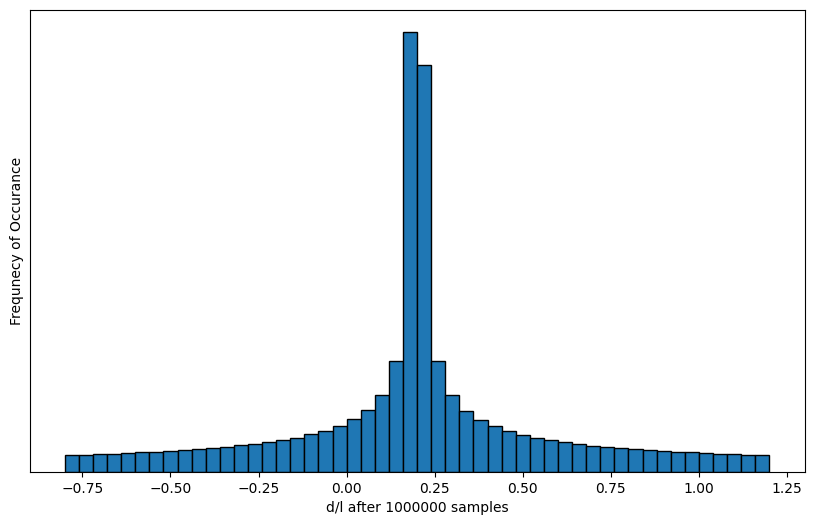

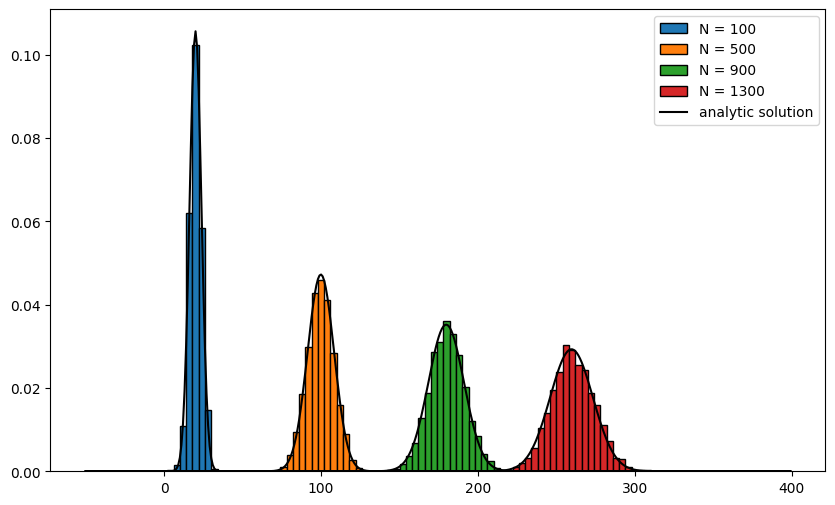

In [ ]:
def q4a(n):
    
    '''This function creates the first histogram and finds the variance and mean of the step length values from the arbitrary
    function. Only takes in a n value for sample size.'''
    
    #creates an array with n elements randomly chosen from [0,1).
    u = np.random.rand(n)
    
    #creates step lengths using arbitrary function
    d = (2*u-1)**3 + 0.2

    #finds variance and mean of step lengths
    sigma = np.std(d)
    mu = np.mean(d)

    print("The calculated mean for the step length was %f, and the calculated variance was %f"%(mu, sigma))

    plt.figure(figsize=(10, 6))
    plt.hist(d, bins=50, edgecolor='black')
    plt.xlabel("d/l after %i samples"%n)
    plt.ylabel("Frequnecy of Occurance")
    plt.yticks([])
    plt.show()

    return sigma, mu

def arbitrary_walking(walkers, steps):
    
    #iterates with the arbitrary step length function
    position = np.zeros(walkers)
    for i in range(steps):
        step = (2*(np.random.rand(walkers))-1)**3 + 0.2
        position += step
    
    return position

#calls the first function we defined that finds the step lengths for sigma and mu
sigma_step, mu_step = q4a(1000000)

plt.figure(figsize=(10,6))
for i in [100, 500, 900, 1300]:

    x = arbitrary_walking(walkers, i)
    plt.hist(x, bins=np.arange(-50,400, 4), density=True, edgecolor='black', label='N = '+str(i))
    
    #this makes the analytical solution, and creates the total sigma and mu values depending on the quantity of steps
    x = np.arange(-50, 400, 1)
    sigma = np.sqrt(i) * sigma_step
    mu = i * mu_step
    y = CLT(x, sigma, mu)
    
    #only prints the analytic solution label on last loop
    label = "analytic solution" if i == 1300 else None
    plt.plot(x, y, color='black', label=label)
    plt.legend()
plt.show()